<a href="https://colab.research.google.com/github/remun5/ProjectWine_PCA/blob/master/ProjectWine_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PCA of Project Wine:**


In this project, we will look into dimensionality reduction using principal component analysis (PCA). The main idea of PCA is to transform a higher dimensional feature space to a lower dimensional space, composed of m orthogonal basis vectors for n features with m < n. The PCA is done by either singular value decomposition (SVD) of the design matrix or the eigenvalue of the covariance matrix.

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
col_name = ['Class','Alcohol','Malic Acid','Ash','Alkalinity of Ash','Magnesium','Total Phenols','Flavonoid','Non Flavonoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted wines', 'Proline']
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
df = pd.read_csv('wine.data', names=col_name, header=None)
df.shape

--2020-08-11 13:43:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [application/x-httpd-php]
Saving to: ‘wine.data.1’

wine.data.1         100%[===================>]  10.53K  --.-KB/s    in 0s      

2020-08-11 13:43:19 (97.3 MB/s) - ‘wine.data.1’ saved [10782/10782]



(178, 14)

This project analyzes a wines dataset available to the public through the University of California Irvine Machine Learning repository. The dataset consists of 178 Italian wine samples, all from the same geographic region, but from 3 different regions. As you can see above, the total number of data are 178, and there are 13 different features and one target column. The target column consists of numbers 1, 2 and 3 identifying the region the wine comes from. 

In [8]:
X = df.iloc[:, 1:]
X.head()
y = df['Class']

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Before PCA, it is important to bring all the data to the same scale.

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [14]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

## PCA Algorithm:

As our first task, we will try to manually compute the PCA. From 13 features, we will reduce the data to 2 dimensional data and visualize.

In [15]:
from numpy.linalg import svd

In [62]:
u, s, vh = svd(X_train_sc,  full_matrices=True)
explained_variances = s**2
explained_variances_ratio = explained_variances/sum(explained_variances, 1) 

In [67]:
transformed = np.matmul(vh, X_train_sc.T)


In [68]:
-pd.DataFrame(transformed.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.166027,-3.615327,-1.151285,-1.167179,-0.221634,3.062380,0.553745,-0.918085,0.639966,-0.262397,-0.112150,-0.071476,-0.755592
1,-3.862612,-0.482177,-1.727584,-0.467086,0.226540,-1.016510,-1.257686,0.113136,0.005981,0.453600,0.504570,0.182884,-0.122403
2,2.283538,1.275033,0.131677,-1.107830,-0.215798,1.004315,0.979052,0.678263,0.481336,0.777822,0.480180,0.458933,0.415850
3,-1.678507,-2.496962,-0.556619,-1.131270,0.003420,2.754779,0.666927,-0.150849,0.121445,0.123055,-0.319599,-0.045823,-0.791136
4,1.572842,0.688203,1.417945,0.425082,0.674013,-0.320546,0.078362,0.127387,-0.251356,0.275627,0.309145,0.119233,0.353050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1.646677,0.920966,-1.955566,-0.314591,0.838742,-0.103732,1.441185,-1.878092,1.031495,0.487055,-0.277463,0.363199,-0.251027
138,-0.248324,2.108473,0.401127,-0.662104,0.363045,0.286398,0.201445,-0.218571,-0.541342,-0.589346,-0.385403,-0.594517,0.226736
139,4.223390,-2.403459,1.137047,-0.905991,0.673900,0.556481,-0.889966,-0.285528,-0.870520,0.669495,-0.129306,0.205881,-0.047855
140,-1.805273,1.490920,0.089911,-0.162752,1.215320,1.066063,-0.607321,-0.446454,-0.374641,-0.603541,-0.507303,0.484378,0.466768


## PCA from Sklearn:

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=8)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [53]:
pca.explained_variance_ratio_

array([0.35900066, 0.18691934, 0.11606557, 0.07371716, 0.0665386 ,
       0.04854582, 0.04195042, 0.02683922])

In [54]:
pd.DataFrame(np.round(pca.components_, 3), columns = X.columns).T

,0,1,2,3,4,5,6,7
Alcohol,0.128,-0.493,-0.185,0.079,-0.310,-0.186,-0.042,0.492
Malic Acid,-0.256,-0.190,0.142,0.424,0.211,-0.656,0.361,0.019
Ash,-0.022,-0.317,0.610,-0.207,-0.199,-0.120,-0.180,-0.105
Alkalinity of Ash,-0.244,0.035,0.595,-0.054,0.094,0.127,-0.255,0.394
Magnesium,0.148,-0.262,0.066,-0.650,0.514,-0.081,0.314,-0.121
Total Phenols,0.385,-0.096,0.177,0.246,-0.011,0.087,-0.083,-0.376
Flavonoid,0.420,-0.015,0.182,0.180,-0.032,0.012,-0.086,-0.175
Non Flavonoid Phenols,-0.299,-0.076,0.203,0.046,-0.459,0.322,0.615,-0.285
Proanthocyanins,0.308,-0.074,0.151,0.331,0.377,0.416,0.394,0.371
Color Intensity,-0.119,-0.534,-0.124,0.117,0.058,0.392,-0.181,0.011


In [74]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
data = pca.transform(X_train_sc)

In [57]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.166027,-3.615327,1.151285,1.167179,0.221634,3.062380,-0.553745,0.918085,-0.639966,0.262397,-0.112150,0.071476,-0.755592
1,-3.862612,-0.482177,1.727584,0.467086,-0.226540,-1.016510,1.257686,-0.113136,-0.005981,-0.453600,0.504570,-0.182884,-0.122403
2,2.283538,1.275033,-0.131677,1.107830,0.215798,1.004315,-0.979052,-0.678263,-0.481336,-0.777822,0.480180,-0.458933,0.415850
3,-1.678507,-2.496962,0.556619,1.131270,-0.003420,2.754779,-0.666927,0.150849,-0.121445,-0.123055,-0.319599,0.045823,-0.791136
4,1.572842,0.688203,-1.417945,-0.425082,-0.674013,-0.320546,-0.078362,-0.127387,0.251356,-0.275627,0.309145,-0.119233,0.353050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1.646677,0.920966,1.955566,0.314591,-0.838742,-0.103732,-1.441185,1.878092,-1.031495,-0.487055,-0.277463,-0.363199,-0.251027
138,-0.248324,2.108473,-0.401127,0.662104,-0.363045,0.286398,-0.201445,0.218571,0.541342,0.589346,-0.385403,0.594517,0.226736
139,4.223390,-2.403459,-1.137047,0.905991,-0.673900,0.556481,0.889966,0.285528,0.870520,-0.669495,-0.129306,-0.205881,-0.047855
140,-1.805273,1.490920,-0.089911,0.162752,-1.215320,1.066063,0.607321,0.446454,0.374641,0.603541,-0.507303,-0.484378,0.466768


### **Plotting 2 dimensional PCA:**

Text(0.5, 1.0, 'Wine Region')

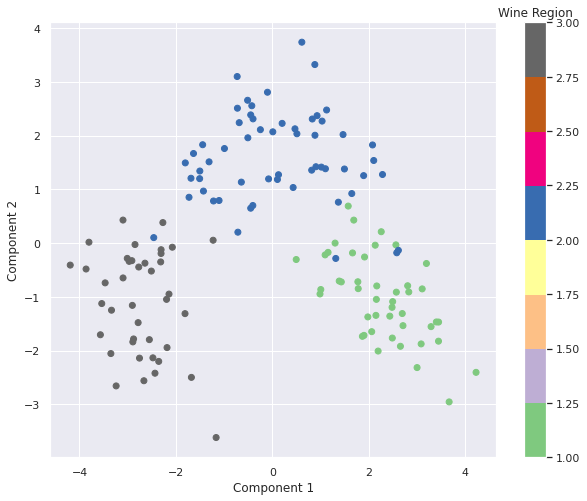

In [91]:
plt.figure(figsize = (10, 8))
plt.scatter(data[:,0], data[:, 1], c = y_train, cmap = 'Accent')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
clb = plt.colorbar()
clb.ax.set_title('Wine Region')

As you can see, even with only PCA components, we have a sufficient separation of the training set.